In [2]:
using Pkg
Pkg.activate(String(@__DIR__) * "/..")
Pkg.instantiate()

 Activating environment at `~/Workspace/NodaLab/Scripts/Conduction/Project.toml`


In [3]:
include("../src/Conduction.jl");
using Plots, VegaLite, LaTeXStrings, QuadGK
import PyPlot

In [4]:
semiconductor = Conduction.Semiconductor(
    1.38 * 10^-23, # Boltzman constant (J.K^-1)
    1.6*10^-19, # Electron's charge (C)
    10^7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
    0.1 * 1.6*10^-19, # Mode effect of the phonons (J)
    2.1 * 10^18, # intrinsic semiconductor's density (cm^-3)
    2.1 * 10^18, # Doping states' density (cm^-3)
    0.1 * 1.6 * 10^-19, # Energy to a vacant target site (J)
    -2*10^5, # Field (V.cm^-1)
    10^13, # Base electron jump rate
    -10.0, # Fermi level (J)
    2.7, # Intrinsic semiconductor's gaussian width (J)
    2.7 # Doping states' gaussian width (J)
);

In [5]:
function einsteinRelation(semiconductor, U, T)
    r = Conduction.RnnVRH(semiconductor, U, T)
    x = Conduction.xf(semiconductor, r, U, T)
    t = Conduction.t(semiconductor, r, U, T)
    return Conduction.D(semiconductor, r, x, t) / Conduction.electronMobility(
        semiconductor, r, x)
end;

In [6]:
range = -10.:0.2:10.;
res = (x -> einsteinRelation(semiconductor, x, 300.)).(range);

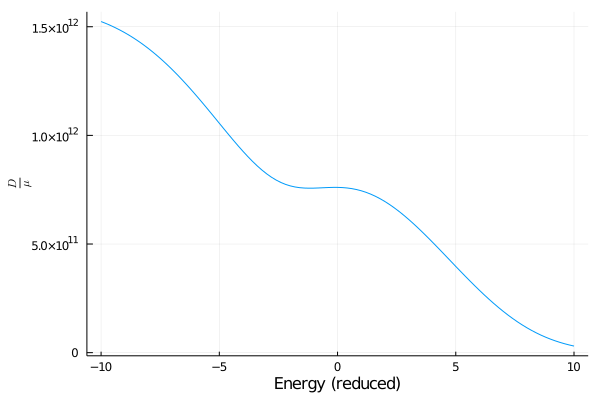

In [12]:
plot(range, res, xlabel="Energy (reduced)", ylabel=L"\dfrac{D}{\mu}", label="")

In [9]:
criteria = (function (x)
    r = Conduction.RnnVRH(semiconductor, x, 300.)
    semiconductor.nu * exp(-r) * Conduction.t(semiconductor, r, x, 300.)
        end).(range);

101-element Array{Float64,1}:
 0.2729755680488768
 0.2722344404998811
 0.27143133013718707
 0.2705661612588071
 0.26963551926439333
 0.2686379954246518
 0.2675706621297439
 0.26643351525015097
 0.26522439955581983
 0.2639429930814224
 0.26258782170557116
 0.26116109576572116
 0.25966097182628484
 ⋮
 0.7675697118748775
 0.7739650459187397
 0.7799953571086976
 0.7856585233597584
 0.7909534566427652
 0.7958907661515876
 0.8004492506340207
 0.8046634550447257
 0.808529899873484
 0.8120668002115294
 0.8152791532315682
 0.8181905483175551

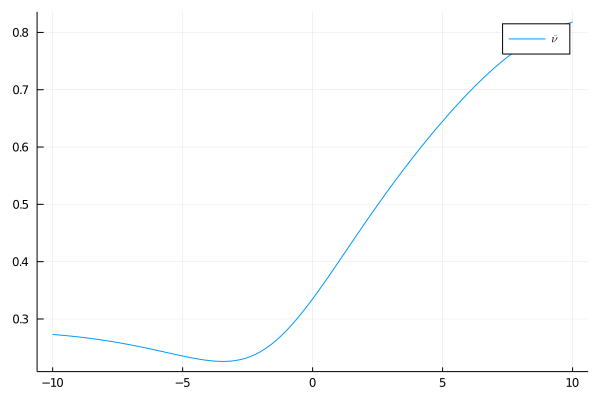

In [13]:
plot(range, criteria, label=L"\bar \nu t")